Task 3: Customer Segmentation / Clustering 

c:\ProgramData\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\ProgramData\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\ProgramData\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\ProgramData\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\ProgramData\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreatePro

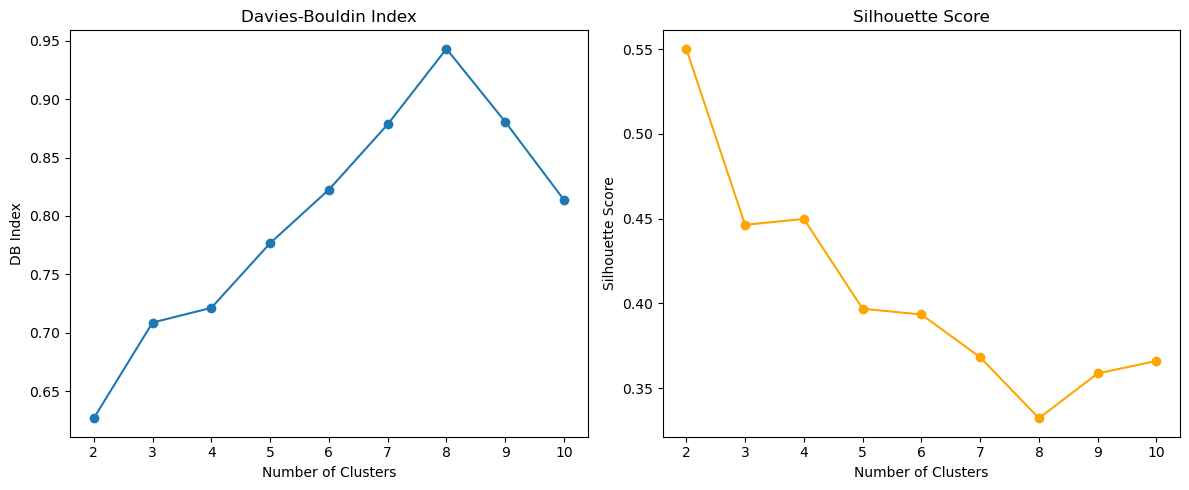

Optimal number of clusters (based on DB Index): 2


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


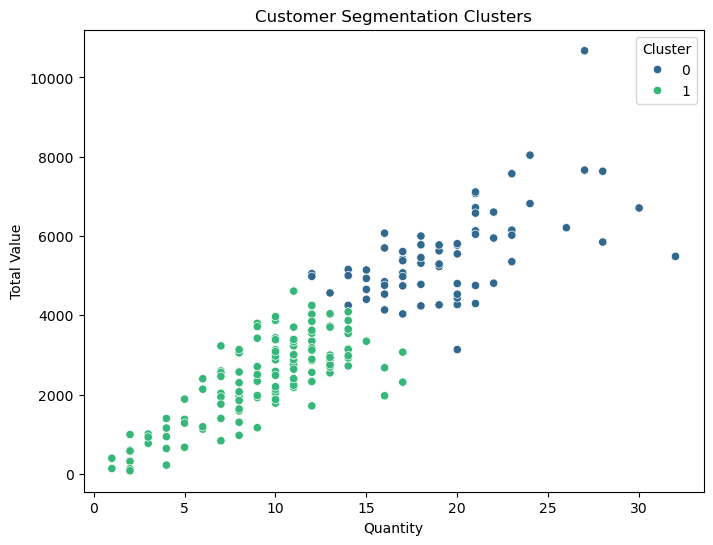

Davies-Bouldin Index (Optimal K): 0.6267041632486107
Silhouette Score (Optimal K): 0.550116764559775


In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns


customers = pd.read_csv("D:/Zeotap/Customers.csv")
transactions = pd.read_csv("D:/Zeotap/Transactions.csv")

# Merging datasets for clustering
transaction_agg = transactions.groupby("CustomerID")[["Quantity", "TotalValue"]].sum().reset_index()
customer_data = customers.merge(transaction_agg, on="CustomerID", how="inner")

# Select features for clustering
features = customer_data[["Quantity", "TotalValue"]]

# Normalize data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Perform clustering with KMeans
db_scores = []
silhouette_scores = []
k_values = range(2, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(scaled_features)
    db_index = davies_bouldin_score(scaled_features, clusters)
    silhouette_avg = silhouette_score(scaled_features, clusters)
    db_scores.append(db_index)
    silhouette_scores.append(silhouette_avg)

# Plot Davies-Bouldin Index and Silhouette Score for each k
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(k_values, db_scores, marker="o")
plt.title("Davies-Bouldin Index")
plt.xlabel("Number of Clusters")
plt.ylabel("DB Index")

plt.subplot(1, 2, 2)
plt.plot(k_values, silhouette_scores, marker="o", color="orange")
plt.title("Silhouette Score")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")

plt.tight_layout()
plt.show()

optimal_k = db_scores.index(min(db_scores)) + 2  
print(f"Optimal number of clusters (based on DB Index): {optimal_k}")

kmeans = KMeans(n_clusters=optimal_k, random_state=42)
customer_data["Cluster"] = kmeans.fit_predict(scaled_features)

# Visualize clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=customer_data["Quantity"],
    y=customer_data["TotalValue"],
    hue=customer_data["Cluster"],
    palette="viridis"
)
plt.title("Customer Segmentation Clusters")
plt.xlabel("Quantity")
plt.ylabel("Total Value")
plt.legend(title="Cluster")
plt.show()

# Clustering metrics
print(f"Davies-Bouldin Index (Optimal K): {min(db_scores)}")
print(f"Silhouette Score (Optimal K): {silhouette_scores[optimal_k - 2]}")
